In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

### Preparation 


#### func

In [3]:
# create count table
def calculate_count_table(df,column_name):
    counts = df[column_name].value_counts().reset_index()
    counts.columns = [column_name, 'count']
    
    counts = counts.sort_values(by='count')
    return counts

def calculate_count_table_with_null(df,column_name):
    counts = df[column_name].value_counts().reset_index()
    counts.columns = [column_name, 'count']
    counts = counts.sort_values(by='count')
    
    null_count = df[column_name].isnull().sum()
    null_row = pd.DataFrame({column_name: ['null'], 'count': [null_count]})
    counts = pd.concat([counts, null_row], ignore_index=True)
    
    return counts


#### Load file

In [4]:
filename="export.csv"

In [5]:
def load_csv(filename):
    # file_loc = 'files/'+filename+'.csv'
    file_loc = filename
    data = pd.read_csv(file_loc)
    return data

raw_data = load_csv(filename)


<ipython-input-5-37fdcd5f7026>:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_loc)


In [6]:
raw_data

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
0,QEVuQwEABlEzkh7fsBBjEe26RyIVcg==,NaN,NaN,NaN,2015-11-26,1069,Condition,Ulcerative colitis,0
1,QEVuQwEAWRNGnuTRqXG2996KSkTIEw==,32.0,male,US,2015-11-26,1069,Condition,Ulcerative colitis,0
2,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4
3,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,female,CA,2017-04-28,3169,Condition,hip pain when gettin up,3
4,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,female,CA,2017-04-28,3170,Condition,pain in hand joints,4
...,...,...,...,...,...,...,...,...,...
7976218,QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==,22.0,female,GB,2019-12-04,1,Tag,tired,NaN
7976219,QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==,22.0,female,GB,2019-12-04,2,Tag,stressed,NaN
7976220,QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==,22.0,female,GB,2019-12-04,9002,Food,soup,NaN
7976221,QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==,22.0,female,GB,2019-12-04,9139,Food,yogurt,NaN


#### ПЕРЕМЕННЫЕ

In [7]:
df = raw_data.copy() 

In [8]:
users=df.drop(columns=['trackable_id','trackable_type','trackable_name','trackable_value','checkin_date']).copy().drop_duplicates()

#### first sight

In [9]:
df

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
0,QEVuQwEABlEzkh7fsBBjEe26RyIVcg==,NaN,NaN,NaN,2015-11-26,1069,Condition,Ulcerative colitis,0
1,QEVuQwEAWRNGnuTRqXG2996KSkTIEw==,32.0,male,US,2015-11-26,1069,Condition,Ulcerative colitis,0
2,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4
3,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,female,CA,2017-04-28,3169,Condition,hip pain when gettin up,3
4,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,female,CA,2017-04-28,3170,Condition,pain in hand joints,4
...,...,...,...,...,...,...,...,...,...
7976218,QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==,22.0,female,GB,2019-12-04,1,Tag,tired,NaN
7976219,QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==,22.0,female,GB,2019-12-04,2,Tag,stressed,NaN
7976220,QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==,22.0,female,GB,2019-12-04,9002,Food,soup,NaN
7976221,QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==,22.0,female,GB,2019-12-04,9139,Food,yogurt,NaN


##### USERS

In [10]:
users.sort_values(by=['age'])

,user_id,age,sex,country
179433,QEVuQwEAYeEPxvaUylfHEwXUgr3T9g==,-196691.0,male,CA
122725,QEVuQwEAOGcYXmDK5KzGxru6bqgxRQ==,-19963.0,doesnt_say,IL
43808,QEVuQwEAL0wmX+OCpgHS+d3F3ftvgg==,-43.0,female,US
313550,QEVuQwEAvq1rRfTTtLtUQ42yOQv0PQ==,-33.0,female,GB
7269634,QEVuQwEA9KFnubyv4AUUfbKOXi/iag==,-30.0,doesnt_say,US
...,...,...,...,...
7442255,QEVuQwEAfLR766DQMjfYWNJpwOlcVA==,NaN,female,AU
7443497,QEVuQwEAe0DF9iwRGPj7sYGYmtDO7g==,NaN,female,US
7518262,QEVuQwEAgYN5rRqIzWjeq7E7ZXqKjQ==,NaN,female,US
7595483,QEVuQwEAgu4h6TUSURerctVPXKDehA==,NaN,female,US


##### Particular user

In [11]:
# test_id='QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg=='
test_id='QEVuQwEA++2fi8XAwh3BnSEwL172Dg==' 
# test_id='QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ=='

#df.loc[df['user_id']==test_id].loc[df['trackable_type']=='Food']
df.loc[df['user_id']==test_id].head(20)

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
6131269,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,42.0,female,US,2019-08-28,442,Condition,Graves' disease,4
6131270,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,42.0,female,US,2019-08-28,702,Symptom,Tiredness,4
6131271,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,42.0,female,US,2019-08-28,278,Symptom,Muscle ache,4
6131272,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,42.0,female,US,2019-08-28,194,Symptom,Sore throat,3
6131273,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,42.0,female,US,2019-08-28,105,Symptom,Hoarseness,4
6131274,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,42.0,female,US,2019-08-28,249,Treatment,Aleve,2 x 220mg
6131275,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,42.0,female,US,2019-08-28,5697,Treatment,Methimazole,10 mg
6131276,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,42.0,female,US,2019-08-28,1,Tag,tired,NaN
6131277,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,42.0,female,US,2019-08-28,13,Tag,good sleep,NaN
6131278,QEVuQwEA++2fi8XAwh3BnSEwL172Dg==,42.0,female,US,2019-08-28,14494,Food,stuffed peppers,NaN


## NULLS

In [12]:
rows_count = df.shape[0]
print("ROWS in raw dataframe:",rows_count)

ROWS in raw dataframe: 7976223


In [13]:
# Подсчет количества нулей
df_nulls = df.isnull().sum()
df_nulls


user_id                 0
age                309226
sex                132135
country            297985
checkin_date            0
trackable_id            0
trackable_type          0
trackable_name          1
trackable_value    926855
dtype: int64

In [14]:
df_nulls_percent = df_nulls*100/rows_count
df_nulls_percent

user_id             0.000000
age                 3.876847
sex                 1.656611
country             3.735916
checkin_date        0.000000
trackable_id        0.000000
trackable_type      0.000000
trackable_name      0.000013
trackable_value    11.620224
dtype: float64

## User INFO : age, sex, country

In [15]:
unique_users = df['user_id'].unique()
unique_countries = df['country'].unique()

In [16]:
print("Number of unique users:", unique_users.shape[0])
print("Number of unique countries:", unique_countries.shape[0])

Number of unique users: 42283
Number of unique countries: 165


#### Age

In [17]:
user_df = users.copy()
user_test = users.copy()

In [18]:
user_df.sort_values(by='age')

,user_id,age,sex,country
179433,QEVuQwEAYeEPxvaUylfHEwXUgr3T9g==,-196691.0,male,CA
122725,QEVuQwEAOGcYXmDK5KzGxru6bqgxRQ==,-19963.0,doesnt_say,IL
43808,QEVuQwEAL0wmX+OCpgHS+d3F3ftvgg==,-43.0,female,US
313550,QEVuQwEAvq1rRfTTtLtUQ42yOQv0PQ==,-33.0,female,GB
7269634,QEVuQwEA9KFnubyv4AUUfbKOXi/iag==,-30.0,doesnt_say,US
...,...,...,...,...
7442255,QEVuQwEAfLR766DQMjfYWNJpwOlcVA==,NaN,female,AU
7443497,QEVuQwEAe0DF9iwRGPj7sYGYmtDO7g==,NaN,female,US
7518262,QEVuQwEAgYN5rRqIzWjeq7E7ZXqKjQ==,NaN,female,US
7595483,QEVuQwEAgu4h6TUSURerctVPXKDehA==,NaN,female,US


In [19]:
# накладываем условия на возраст от 0 до 100
user_df.loc[(user_df['age'] < 0) | (user_df['age'] > 100), 'age'] = np.nan
print('Number of deleted rows:', user_test['age'].notnull().sum()-user_df['age'].notnull().sum())

Number of deleted rows: 12


In [20]:
# Подсчитываем количество встречаемости каждого возраста
age_counts = calculate_count_table(user_df,'age')
age_counts

,age,count
87,86.0,1
86,85.0,1
84,90.0,2
85,81.0,2
83,87.0,2
...,...,...
4,24.0,1459
3,26.0,1466
2,28.0,1468
1,27.0,1514


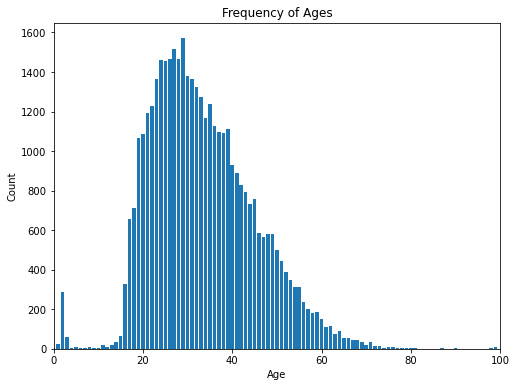

In [21]:
# Age histogram
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(age_counts['age'], age_counts['count'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Frequency of Ages')
plt.xlim(0, 100)
plt.show()

In [22]:
# WHAT IS DONE

# Возраст не входящий в интервал 0-100 заменен на null
# => количество нулей в колонке 'age' увеличилось
# user_df.loc[(user_df['age'] < 0) | (user_df['age'] > 100), 'age'] = np.nan
print('Number of deleted rows (normal age interval 0-100):', user_test['age'].notnull().sum()-user_df['age'].notnull().sum(),'\n')

# QUESTIONS

# есть группа детей - cтроить ли на них будующую модель? Стоит ли отсекать людей еще сильнее? от 18 до 80? 
# Мы же все-таки будем предсказывать на основании симптомов, а дети - они даже не сами это записывают
user_df2 = users.copy()
ages_count = user_df2[user_df2['age'].notnull()].shape[0]
children_count = user_df2[(user_df2['age'] >= 0) & (user_df2['age'] <= 18)].shape[0]
per=children_count*100/ages_count
print('Number of children (0-18):', children_count, '\nAll ages:',ages_count, "\nChildren/All = %.2f%%" % per)

# + есть данные, где люди пишут год рождения - всего 2 записи:
user_df2 = users.copy()
user_df2[(user_df2['age'] >= 1923) & (user_df2['age'] <= 2023)]




Number of deleted rows (normal age interval 0-100): 12 

Number of children (0-18): 2267 
All ages: 40604 
Children/All = 5.58%


,user_id,age,sex,country
203023,QEVuQwEA53bmvFhv/THxsqJHWATqog==,1942.0,female,CA
647435,QEVuQwEAiLMCOYKtoAunyLpqZ8g7iw==,2018.0,doesnt_say,US


#### Sex

In [23]:
calculate_count_table_with_null(user_df,'sex')

,sex,count
0,other,1200
1,doesnt_say,1640
2,male,3497
3,female,34659
4,null,1287


In [24]:
# Надо ли doesnt_say изменять на null? Это не одно и то же? Other - третий род или тоже пренебрегаем?
# user_df.loc[(user_df['sex'] == 'doesnt_say')] = np.nan

#### Country

In [25]:
country_table_count = calculate_count_table(user_df,'country')
country_table_count

,country,count
163,BZ,1
139,NI,1
138,BQ,1
137,ST,1
136,AW,1
...,...,...
4,NZ,456
3,AU,2428
2,CA,2839
1,GB,6147


In [26]:
main_countries = country_table_count.loc[country_table_count['count']>200]
main_countries

,country,count
10,IE,223
9,ZA,227
8,NO,239
7,SE,268
6,DE,318
5,NL,345
4,NZ,456
3,AU,2428
2,CA,2839
1,GB,6147


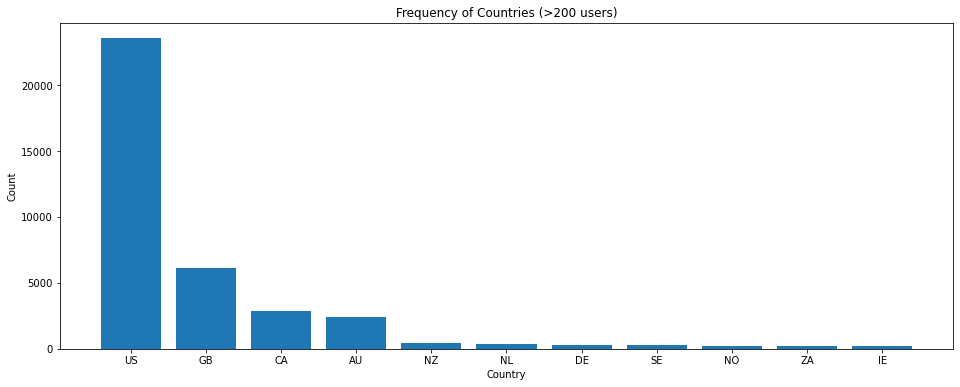

In [27]:
main_countries=main_countries.sort_values(by='count', ascending=False)

plt.figure(figsize=(16, 6))
plt.bar(main_countries['country'], main_countries['count'])
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Frequency of Countries (>200 users)')
plt.show()

In [28]:
# в каком случае мы можем, а в каком не можем пренебречь? Как это понять?

#### Overall

In [29]:
# Сколько процентов значений отсутствует в колонках
user_df.isnull().sum()*100/user_df['user_id'].shape[0]

user_id    0.000000
age        3.999243
sex        3.043776
country    6.463591
dtype: float64

In [30]:
# WHAT IS DONE

# есть выбросы - изменяем на null, оставляем возраст (0-100).
# users.loc[(users['age'] < 0) | (users['age'] > 100), 'age'] = np.nan

## Trackable types

#### Overall

In [31]:
unique_trackable_types = pd.DataFrame(df['trackable_type'].unique(), columns=['Unique_trackable_type'])
print(unique_trackable_types)

  Unique_trackable_type
0             Condition
1               Symptom
2               Weather
3             Treatment
4                   Tag
5                  Food
6                   HBI


In [32]:
unique_variables = {}
variables_sizes = {}

for trackable_type in df['trackable_type'].unique():
    trackable_names = df['trackable_name'].loc[(df['trackable_type'] == trackable_type) & (df['trackable_name'].notnull())]
    unique_variables[trackable_type] = trackable_names.unique()
    variables_sizes[trackable_type] = trackable_names.size

In [33]:
for trackable_type in df['trackable_type'].unique():
    size=variables_sizes[trackable_type]
    unique_size=unique_variables[trackable_type].size
    per=unique_size*100/size
    print(trackable_type,':',size,', unique:', unique_size, ", size/unique_size = %.2f%%" % per )
    print(trackable_type,':',unique_variables[trackable_type])
    print("-"*100)

# посчитала процент, думала он в чем-то поможет, но видимо просто так

Condition : 1111517 , unique: 9443 , size/unique_size = 0.85%
Condition : ['Ulcerative colitis'
 'pain in left upper arm felt like i was getting a shot'
 'hip pain when gettin up' ... 'wind tunnel electric jolt'
 'Pheochromocytoma ' 'atypical bulimia']
----------------------------------------------------------------------------------------------------
Symptom : 3642279 , unique: 23157 , size/unique_size = 0.64%
Symptom : ['Joint stiffness' 'Nausea' 'Anxiety' ... 'oppressed (thorax)'
 'rectal inflammation' 'poor productivity']
----------------------------------------------------------------------------------------------------
Weather : 1393806 , unique: 6 , size/unique_size = 0.00%
Weather : ['icon' 'temperature_min' 'temperature_max' 'precip_intensity' 'pressure'
 'humidity']
----------------------------------------------------------------------------------------------------
Treatment : 901820 , unique: 8155 , size/unique_size = 0.90%
Treatment : ['Zofran' 'Klonopin' 'Caffeine' ... 'TM

In [34]:
df.loc[(df['trackable_type'] == 'HBI')].isnull().sum()

user_id            0
age                4
sex                1
country            1
checkin_date       0
trackable_id       0
trackable_type     0
trackable_name     0
trackable_value    0
dtype: int64

#### Food

In [35]:
# if trackable_type == FOOD: trackable_value - always NULL 
# if trackable_type == FOOD: trackable_name - always IS EXSIST (word or str)

In [36]:
df.loc[df['trackable_type']=='Food'].isnull().sum()

user_id                 0
age                 21135
sex                  9453
country             19986
checkin_date            0
trackable_id            0
trackable_type          0
trackable_name          0
trackable_value    480971
dtype: int64

In [37]:
df.loc[df['trackable_type']=='Food']

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
914,QEVuQwEA5hkzTOaPksnHJZZjyHW/Ww==,50.0,female,US,2017-03-16,8838,Food,coffee,NaN
1098,QEVuQwEAls3goJ2eZ9lCTdLGUAE5Wg==,44.0,male,US,2019-04-13,11059,Food,nut bar,NaN
1984,QEVuQwEA39gcq8BrtdzGE9gPIHS2mA==,38.0,female,BE,2017-02-04,8815,Food,chicken,NaN
1985,QEVuQwEA39gcq8BrtdzGE9gPIHS2mA==,38.0,female,BE,2017-02-04,9384,Food,potato chips,NaN
2001,QEVuQwEA39gcq8BrtdzGE9gPIHS2mA==,38.0,female,BE,2017-07-31,8801,Food,pizza,NaN
...,...,...,...,...,...,...,...,...,...
7976203,QEVuQwEA/3ZnJPHdtLiOWBy1VAYIYA==,48.0,male,GB,2019-12-04,8960,Food,chicken sandwich,NaN
7976204,QEVuQwEA/3ZnJPHdtLiOWBy1VAYIYA==,48.0,male,GB,2019-12-04,9119,Food,toast,NaN
7976220,QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==,22.0,female,GB,2019-12-04,9002,Food,soup,NaN
7976221,QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==,22.0,female,GB,2019-12-04,9139,Food,yogurt,NaN


In [38]:
# необходимо будет разделить данные, создать какой-то словарь "еды" или как? Что с этим делать?
pd.DataFrame(unique_variables['Food'])

,0
0,coffee
1,nut bar
2,chicken
3,potato chips
4,pizza
...,...
46335,coconut porridge
46336,white chocolate chip cookie
46337,"Fast foods, miniature cinnamon rolls"
46338,chicken pizza for 1


In [39]:
# мини-попытка что-то сделать. Вопрос - через что продолжать? 
import string

# изначально:
# 480971 всего элементов
# 46339 уникальных элементов - записей через пробел/запятую и т д

combined_string = ' '.join(unique_variables['Food']) # 18054 элемента : разделили все слова на _
combined_string = combined_string.lower() # 15222 элемента : lowercase
combined_string = ''.join(char for char in combined_string if char not in string.punctuation) # 13565 элементов : delete punctuation
combined_string = ''.join(char for char in combined_string if not char.isdigit()) # 13216 элементов: delete numbers

# есть еда по словосочетаниям, включающая 3-4 слова вместе
# не уверена, что цифры важны в этом контексте
# поиск ошибок в словах - существуют функции в python, nlp - что-то там - есть ли там все слова? словосочетания? 
# как научить программу определять еду, исправлять ошибки и т д

split_array = combined_string.split()
food_array = pd.DataFrame(list(set(split_array))) #unique
food_array

# в итоге (в самом простом приближении) 13216 элементов
# потом нужно, наверное, посчитать количество вхождений каждого продукта в tracking_name ? Я попыталась, у меня не вышло

,0
0,upside
1,squres
2,edam
3,salem
4,gail’s
...,...
13211,olive
13212,monkfishcookedwet
13213,cape
13214,omellette


#### Tag

In [40]:
# if trackable_type == TAG: trackable_value - always NULL 
# if trackable_type == TAG: trackable_name - always IS EXSIST (word or str) кроме 1 

In [41]:
df.loc[df['trackable_type']=='Tag'].isnull().sum()

user_id                 0
age                 23961
sex                  6286
country             14780
checkin_date            0
trackable_id            0
trackable_type          0
trackable_name          1
trackable_value    445669
dtype: int64

In [42]:
df.loc[df['trackable_type']=='Tag']

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
26,QEVuQwEAO+R1md5HUn8+w1Qpbg7ogw==,NaN,NaN,NaN,2015-05-26,1,Tag,tired,NaN
27,QEVuQwEAO+R1md5HUn8+w1Qpbg7ogw==,NaN,NaN,NaN,2015-05-26,2,Tag,stressed,NaN
28,QEVuQwEAO+R1md5HUn8+w1Qpbg7ogw==,NaN,NaN,NaN,2015-05-26,3,Tag,feels,NaN
36,QEVuQwEAO+R1md5HUn8+w1Qpbg7ogw==,NaN,NaN,NaN,2015-05-27,2,Tag,stressed,NaN
37,QEVuQwEAO+R1md5HUn8+w1Qpbg7ogw==,NaN,NaN,NaN,2015-05-27,1,Tag,tired,NaN
...,...,...,...,...,...,...,...,...,...
7976199,QEVuQwEA/3ZnJPHdtLiOWBy1VAYIYA==,48.0,male,GB,2019-12-04,811,Tag,masturbated,NaN
7976200,QEVuQwEA/3ZnJPHdtLiOWBy1VAYIYA==,48.0,male,GB,2019-12-04,14242,Tag,morning yoga,NaN
7976201,QEVuQwEA/3ZnJPHdtLiOWBy1VAYIYA==,48.0,male,GB,2019-12-04,9010,Tag,Frequent urination,NaN
7976218,QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==,22.0,female,GB,2019-12-04,1,Tag,tired,NaN


In [43]:
pd.DataFrame(unique_variables['Tag']).head(20)
# какие-то заметки, которые могут быть включены:
# в FOOD: ex. "banana", "smoothie"
# в CONDITION: ex. "tired", "stressed", "sad"

# Правильно ли я понимаю, что надо будет делать словари, подходящие под различные колонки, и если надо переносить информацию в них?
# помню, что есть функции, которые меняют еще слова в начальную форму, чтобы их можно было сравнивать.

,0
0,tired
1,stressed
2,feels
3,Went to work
4,worried
5,saw a movie
6,had sex
7,doctor appointment
8,inventory at work
9,ate breakfast


#### HBI

In [44]:
# if trackable_type == HBI: trackable_value - always == "HBI"
# if trackable_type == HBI: trackable_name - always IS EXSIST

In [45]:
df.loc[df['trackable_type']=='HBI'].shape[0]

161

In [46]:
df.loc[df['trackable_type']=='HBI'].isnull().sum()

user_id            0
age                4
sex                1
country            1
checkin_date       0
trackable_id       0
trackable_type     0
trackable_name     0
trackable_value    0
dtype: int64

In [47]:
df.loc[df['trackable_type']=='HBI']

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
2032,QEVuQwEA+L6bweWf5MLOheHFIXSvag==,34.0,male,AU,2017-04-08,58e82d65078af70004f4298f,HBI,HBI,0
237357,QEVuQwEA3WX0VH9h8vLnkT7k8g6PYQ==,32.0,male,DK,2018-04-03,5ac3af88b1ea8a0004aef3c3,HBI,HBI,1
251895,QEVuQwEA36x/p2CQkWdFDUjtAAS0yQ==,34.0,female,US,2017-03-06,58bdec802b89d90004e5eb75,HBI,HBI,9
279454,QEVuQwEAOYS5LJzmuirMn6I1smz7Ig==,26.0,male,AU,2017-07-20,59702063c4d3270004bf4b0e,HBI,HBI,5
289227,QEVuQwEAjLvH4xtF2htikhFW66chxA==,45.0,female,US,2017-04-28,5903d542cee73d000490b197,HBI,HBI,1
...,...,...,...,...,...,...,...,...,...
6964123,QEVuQwEAmcJiKWX9JXBRmD6mAGVLmA==,39.0,doesnt_say,US,2019-10-15,5da5cbd11850d2000484daa7,HBI,HBI,5
6964256,QEVuQwEAmcJiKWX9JXBRmD6mAGVLmA==,39.0,doesnt_say,US,2019-11-13,5dcc7e5f8055300004924202,HBI,HBI,2
6975337,QEVuQwEAxLlJl2YTxYe9ADaSXzV+3Q==,17.0,female,US,2019-03-20,5c925c8775a22b0004101ea3,HBI,HBI,4
7408125,QEVuQwEAgf2pc0QyddE7XPltH5RVuQ==,23.0,female,CA,2019-12-04,5de7f9b07e53fe00047f9c88,HBI,HBI,1


In [48]:
hbi_counts = calculate_count_table(df.loc[df['trackable_type']=='HBI'],'trackable_value')
hbi_counts

,trackable_value,count
17,11,1
15,12,1
16,20,1
14,13,2
13,18,2
12,15,4
11,14,4
10,10,7
9,8,8
8,0,9


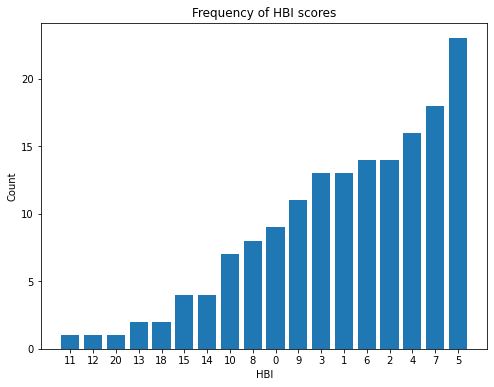

In [49]:
plt.figure(figsize=(8, 6))
plt.bar(hbi_counts['trackable_value'], hbi_counts['count'])
plt.xlabel('HBI')
plt.ylabel('Count')
plt.title('Frequency of HBI scores')
plt.show()

#### Weather

In [50]:
type = 'Weather'
type_df = df.loc[df['trackable_type']==type]

In [51]:
pd.DataFrame(unique_variables[type])

,0
0,icon
1,temperature_min
2,temperature_max
3,precip_intensity
4,pressure
5,humidity


In [52]:
type_df.shape[0]

1393806

In [53]:
type_df.isnull().sum()

user_id                0
age                63312
sex                21984
country            50592
checkin_date           0
trackable_id           0
trackable_type         0
trackable_name         0
trackable_value      215
dtype: int64

In [54]:
# если trackeable_type == "Weather" AND trackable_value=="NaN" - можно эту запись точно удалять полностью
# никакого смысла в этой строчке нет
type_df.loc[type_df['trackable_value'].isnull()]

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
112946,QEVuQwEAxZP31SEiUvDf/+pSmJa6BA==,43.0,female,GB,2017-04-19,10570,Weather,precip_intensity,NaN
112952,QEVuQwEAxZP31SEiUvDf/+pSmJa6BA==,43.0,female,GB,2017-04-18,10570,Weather,precip_intensity,NaN
112958,QEVuQwEAxZP31SEiUvDf/+pSmJa6BA==,43.0,female,GB,2017-04-17,10571,Weather,precip_intensity,NaN
112964,QEVuQwEAxZP31SEiUvDf/+pSmJa6BA==,43.0,female,GB,2017-04-16,10571,Weather,precip_intensity,NaN
293860,QEVuQwEACjXN9fKtn9jDeIvYp3CZDA==,21.0,other,GB,2017-05-27,13800,Weather,precip_intensity,NaN
...,...,...,...,...,...,...,...,...,...
7054938,QEVuQwEAFAi0S6uWE0fwQ909ocjt9w==,22.0,female,CA,2018-09-04,139184,Weather,precip_intensity,NaN
7056245,QEVuQwEAD/oqJk7VBncYTKbICS7stg==,37.0,female,US,2019-12-03,225843,Weather,icon,NaN
7060319,QEVuQwEAcpHdZQ4R84FL0tIRjDQltQ==,33.0,female,US,2019-11-11,221872,Weather,icon,NaN
7260318,QEVuQwEADHm0s/LHJmOG9gsnLoEGVg==,23.0,doesnt_say,US,2019-12-03,225805,Weather,icon,NaN


#### Treatment

In [55]:
# Сюда входят названия лекарств
# if trackable_type == Treatment: trackable_value -

In [56]:
pd.DataFrame(unique_variables['Treatment'])

,0
0,Zofran
1,Klonopin
2,Caffeine
3,Methadone
4,Provigil
...,...
8150,Bufferin A
8151,Medicon 15mg
8152,TMJ exercises
8153,salt water gargle


In [57]:
# мини-попытка что-то сделать. Вопрос - через что продолжать? 
import string

# изначально:
# 901820 всего элементов treatment
# 8155 уникальных элементов - записей через пробел/запятую и т д
treatment = unique_variables['Treatment']


combined_string = ' '.join(treatment) # у меня не работает lowercase не разделяя строки по словам
combined_string = combined_string.lower() # 7221 элемент : lowercase
# combined_string = ''.join(char for char in combined_string if char not in string.punctuation) # 6942 элементов : delete punctuation
# combined_string = ''.join(char for char in combined_string if not char.isdigit()) # 6693 элементов: delete numbers

# стоит ли учитывать дозировки? Или только болезни?

split_array = combined_string.split()
treatment_array = pd.DataFrame(list(set(split_array))) #unique
treatment_array



,0
0,l-thyroxin
1,counselor
2,fumerate
3,bio-b
4,azithioprine
...,...
7216,desvenlafaxine
7217,armodafinil
7218,sirolimus
7219,dilator


#### Symptom

In [58]:
pd.DataFrame(unique_variables['Symptom'])

,0
0,Joint stiffness
1,Nausea
2,Anxiety
3,Fatigue
4,mania
...,...
23152,mystery soreness/pain
23153,highbrow headache right
23154,oppressed (thorax)
23155,rectal inflammation


In [59]:
# изначально:
# Symptom : 3642279 , unique: 23157 , size/unique_size = 0.64%
# 23157 уникальных элементов - записей через пробел/запятую и т д 

symptom = unique_variables['Symptom']

combined_string = ' '.join(symptom) # у меня не работает lowercase не разделяя строки по словам
combined_string = combined_string.lower() # 10182 элемент : lowercase
combined_string = ''.join(char for char in combined_string if char not in string.punctuation) # 9106 элементов : delete punctuation
combined_string = ''.join(char for char in combined_string if not char.isdigit()) # 8984 элементов: delete numbers

split_array = combined_string.split()
symptom_array = pd.DataFrame(list(set(split_array))) #unique
symptom_array


,0
0,musculoskeletal
1,cocyx
2,impatienceanxietydepression
3,tired
4,va
...,...
8980,craft
8981,acrocyanosis
8982,inleft
8983,definitely


#### Condition

In [60]:
# предусловия - что у человека в принципе есть за болезни

In [61]:
pd.DataFrame(unique_variables['Condition'])

,0
0,Ulcerative colitis
1,pain in left upper arm felt like i was getting...
2,hip pain when gettin up
3,pain in hand joints
4,numbness in right hand
...,...
9438,sore thyroid
9439,light headedness
9440,wind tunnel electric jolt
9441,Pheochromocytoma


In [62]:
# изначально:
# Condition : 1111517 , unique: 9443 , size/unique_size = 0.85%
# 9443 уникальных элементов - записей через пробел/запятую и т д 

condition = unique_variables['Condition']

combined_string = ' '.join(condition) # 7755 элемент : у меня не работает lowercase не разделяя строки по словам
combined_string = combined_string.lower() # 6352 элемент : lowercase
combined_string = ''.join(char for char in combined_string if char not in string.punctuation) # 5995 элементов : delete punctuation
combined_string = ''.join(char for char in combined_string if not char.isdigit()) # 5930 элементов: delete numbers

split_array = combined_string.split()
condition_array = pd.DataFrame(list(set(split_array))) #unique
condition_array.head(10)

# получился словарик слов используемых там 

,0
0,musculoskeletal
1,tired
2,grains
3,illamående
4,anticoagulant
5,polyneuropathy
6,laberenthitis
7,by
8,dysthymic
9,hyperhidrosis


In [63]:
pd.DataFrame(condition)

,0
0,Ulcerative colitis
1,pain in left upper arm felt like i was getting...
2,hip pain when gettin up
3,pain in hand joints
4,numbness in right hand
...,...
9438,sore thyroid
9439,light headedness
9440,wind tunnel electric jolt
9441,Pheochromocytoma


## COLLINEAR

In [64]:
import seaborn as sn
import matplotlib.pyplot as plt

In [65]:
data_mapped = user_df.copy()

In [66]:
calculate_count_table_with_null(user_df,'sex')

,sex,count
0,other,1200
1,doesnt_say,1640
2,male,3497
3,female,34659
4,null,1287


In [67]:
data_mapped['sex']=data_mapped['sex'].map({'other': np.nan, 'doesnt_say': np.nan, 'male':0, 'female':1})

In [68]:
calculate_count_table_with_null(data_mapped,'sex')

,sex,count
0,0.0,3497
1,1.0,34659
2,null,4127


In [69]:
data_mapped

,user_id,age,sex,country
0,QEVuQwEABlEzkh7fsBBjEe26RyIVcg==,NaN,NaN,NaN
1,QEVuQwEAWRNGnuTRqXG2996KSkTIEw==,32.0,0.0,US
2,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,1.0,CA
22,QEVuQwEAHgM/igE3w0tBL14Jq1nEfw==,NaN,NaN,NaN
23,QEVuQwEAO+R1md5HUn8+w1Qpbg7ogw==,NaN,NaN,NaN
...,...,...,...,...
7970576,QEVuQwEAs8PnkVUj+4SbIE/3Eh4vSg==,30.0,NaN,US
7974772,QEVuQwEAvkCVm+/1EeCVt4W69d+JAw==,35.0,NaN,US
7975104,QEVuQwEAe+Me/lpz+GEjbH7bMu3UeA==,38.0,1.0,JP
7975409,QEVuQwEA/3ZnJPHdtLiOWBy1VAYIYA==,48.0,0.0,GB


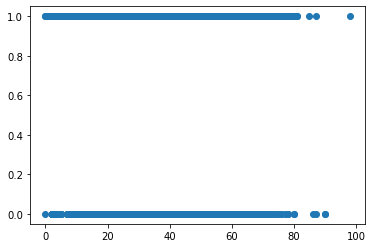

In [70]:
plt.scatter(data_mapped['age'],data_mapped['sex'])
plt.show()

In [71]:
from sklearn.preprocessing import LabelEncoder

# Создаем экземпляр LabelEncoder
label_encoder = LabelEncoder()

# Преобразуем категориальные значения в числовой формат
data_mapped['country'] = label_encoder.fit_transform(data_mapped['country'])


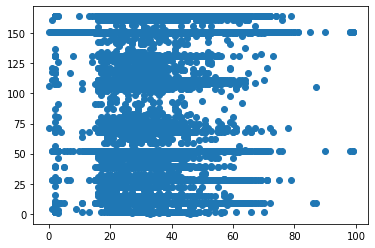

In [72]:
plt.scatter(data_mapped['age'],data_mapped['country'])
plt.show()

## NLTK FOOD

In [73]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


In [74]:
df_food = df.loc[df['trackable_type']=='Food'].loc[df['country']=='US']
df_food = df_food.drop(columns='trackable_value')
df_food

food = df_food['trackable_name'].unique()

In [75]:
food = df_food['trackable_name']
# как определять язык? если страна россия, люди могут пистаь по английски

In [76]:
# ENGLISH
# Выбрала Россию - везде английский, но по сути, слова на разных языках, могут быть эмоджи
# Выбрала Испанию - везде испанский/английский
# Можно ли как-то определять язык записей?

# %pip install re
# %pip install nltk
# %pip install unicodedata
# %pip install contractions
# %pip install inflect
# %pip install emoji

import emoji
import string
import unicodedata
import contractions
import inflect
from nltk.tokenize import word_tokenize

def emojis_words(text):
    # Модуль emoji: преобразование эмоджи в их словесные описания
    clean_text = emoji.demojize(text, delimiters=(" ", " "))
    # Редактирование текста путём замены ":" и" _", а так же - путём добавления пробела между отдельными словами
    clean_text = clean_text.replace(":", "").replace("_", " ")
    return clean_text

# Функция для очистки текста
def clean_text(input_text):    
    
    # HTML-теги: первый шаг - удалить из входного текста все HTML-теги
    clean_text = re.sub('<[^<]+?>', '', input_text)
    
    # URL и ссылки: далее - удаляем из текста все URL и ссылки
    clean_text = re.sub(r'http\S+', '', clean_text)

    # Эмоджи и эмотиконы: используем собственную функцию для преобразования эмоджи в текст
    # Важно понимать эмоциональную окраску обрабатываемого текста
    clean_text = emojis_words(clean_text)
    
    # Приводим все входные данные к нижнему регистру
    clean_text = clean_text.lower()

    # Убираем все пробелы
    # Так как все данные теперь представлены словами - удалим пробелы
    clean_text = re.sub('\s+', ' ', clean_text)

    # Преобразование символов с диакритическими знаками к ASCII-символам: используем функцию normalize из модуля unicodedata и преобразуем символы с диакритическими знаками к ASCII-символам
    clean_text = unicodedata.normalize('NFKD', clean_text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    # Разворачиваем сокращения: текст часто содержит конструкции вроде "don't" или "won't", поэтому развернём подобные сокращения
    clean_text = contractions.fix(clean_text)

    # Убираем специальные символы: избавляемся от всего, что не является "словами"
    clean_text = re.sub('[^a-zA-Z0-9\s]', '', clean_text)

    # Записываем числа прописью: 100 превращается в "сто" (для компьютера)
    temp = inflect.engine()
    words = []
    for word in clean_text.split():
        if word.isdigit():
            words.append(temp.number_to_words(word))
        else:
            words.append(word)
    clean_text = ' '.join(words)

    # Стоп-слова: удаление стоп-слов - это стандартная практика очистки текстов
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(clean_text)
    tokens = [token for token in tokens if token not in stop_words]
    clean_text = ' '.join(tokens)

    # Знаки препинания: далее - удаляем из текста все знаки препинания
    clean_text = re.sub(r'[^\w\s]', '', clean_text)

    # И наконец - возвращаем очищенный текст
    return clean_text

# food_list = set()
# for string in food:
#     food_list.add(clean_text(string))

for key in food:
    food[key] = clean_text(food[key])

# test_str = "Oksana, I love you my dear 🥝!"
# clean_text(test_str)

KeyError: 'coffee'

In [ ]:
food

914                           coffee
1098                         nut bar
3599                  chobani yogurt
3660                  chobani yogurt
4639                            milk
                     ...            
7974983                        pasta
7974984              instant oatmeal
7974985              chips and salsa
7974986               veggie stirfry
7974987    unsweetened black ice tea
Name: trackable_name, Length: 276309, dtype: object

In [ ]:
food

{'',
 'hot pockets meatballs mozzarella stuffed sandwich frozen',
 'peach rings gummy candy',
 'beef jerkey',
 'five guys burger fries',
 'guacamole',
 'vegan pasta',
 'heat knees',
 'mason dixon salad chicken',
 'slimfast',
 'chicken finger plate zaxbys',
 'spaghetti bolognese',
 'chinese pudding',
 'cobb salad',
 'coconut pancakes',
 'bagel thin',
 'frappuccino',
 'turkey meatballs',
 'eggs noodles pork',
 'pork steak',
 'new wine',
 'cube steak',
 'strawberry almond yogurt',
 'riceeggcheese',
 'lean cuisine chicken stir fry',
 'leftover tortellini',
 'meringue cookies w peanuts cranberries',
 'breakfast soup',
 'oatmeal walnuts',
 'bithday meal dennys',
 'soup chicken broth bouillon dry',
 'powerade mixed berry',
 'toastbread',
 'stuffed french toast',
 'bagels plain enriched calcium propionate includes onion poppy sesame',
 'small homemade chipotle salad',
 'eggs wrap',
 'chocolate raspberry tart',
 'cfa wrap',
 'scone',
 'chili bread',
 'gyro salad atlantis',
 'blue bean chips',
 

In [ ]:
all_words_line = ' '.join(food)
all_words_line

' hot pockets meatballs mozzarella stuffed sandwich frozen peach rings gummy candy beef jerkey five guys burger fries guacamole vegan pasta heat knees mason dixon salad chicken slimfast chicken finger plate zaxbys spaghetti bolognese chinese pudding cobb salad coconut pancakes bagel thin frappuccino turkey meatballs eggs noodles pork pork steak new wine cube steak strawberry almond yogurt riceeggcheese lean cuisine chicken stir fry leftover tortellini meringue cookies w peanuts cranberries breakfast soup oatmeal walnuts bithday meal dennys soup chicken broth bouillon dry powerade mixed berry toastbread stuffed french toast bagels plain enriched calcium propionate includes onion poppy sesame small homemade chipotle salad eggs wrap chocolate raspberry tart cfa wrap scone chili bread gyro salad atlantis blue bean chips sesame snaps soup chunky chicken noodle canned readytoserve coffee one cup chocolate frozen custard chocolate kiss tootsie roll pumpkin biscotti batter evening vitamins cof

In [ ]:
# cтеммизация - привести слово к его основе
# то есть это можно делать только на отдельных словах? В строке не получится? только если через цикл?

stemmer = PorterStemmer()

def stemming_str(str):
    tokens = word_tokenize(str)
    stemmed_review = [stemmer.stem(word) for word in tokens]
    return stemmed_review

stemming_food = food.copy()

for key in stemming_food:
    stemming_food[key] = stemming_str(stemming_food[key])

stemming_food


KeyboardInterrupt: 

In [ ]:

str = " omlette hamburgers eggs "

tokens = word_tokenize(str)
stemmed_review = [stemmer.stem(word) for word in tokens]
stemmed_review

['omlett', 'hamburg', 'egg']